In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import obspy
import cartopy.crs as ccrs
import pandas as pd
from obspy.geodetics import gps2dist_azimuth, kilometer2degrees

In [3]:
def rad_pattern(mt):
    
    m = cart_mt
    Np = 101 # Use uneven number to have a value in the center closest to zero depth
    phi = np.linspace(0, 2*np.pi, 2*Np) # (0 to 360), 20 points
    theta = np.linspace(0, np.pi, Np) # (-90 to 90), 10 points
    theta, phi = np.meshgrid(theta, phi)
    x = np.sin(phi) * np.sin(theta) # North
    y = np.cos(phi) * np.sin(theta) # East
    z = np.cos(theta) # Down

    # RADIATION PATTERN COEFFICIENTS FOR P-WAVES
    Sp = (1 - 4*z**2)*( m[0]*y**2 + 2*m[1]*x*y + m[3]*x**2 ) + (1 - 2*z**2)*( 4*m[2]*y*z + 4*m[4]*x*z ) + m[5]*(3*z**2 - 4*z**4)
    
    xP = np.abs(Sp)*np.sin(theta)*np.cos(phi) # why do the equations switch? Now matches wikipedia convention
    yP = np.abs(Sp)*np.sin(theta)*np.sin(phi)
    zP = np.abs(Sp)*np.cos(theta)

    # P-wave half depth slice at surface with beachball
    z0_index = int((Np-1)/2)
    x_slice = xP[:, z0_index:]
    y_slice = yP[:, z0_index:]

    colormap = cm.seismic
    clrP = cm.ScalarMappable(norm = Normalize(vmin = Sp.min(), vmax = Sp.max()), cmap = colormap)
    flat_clrP = clrP.to_rgba(Sp[:, z0_index:])

    return x_slice, y_slice, flat_clrP


In [4]:
# Function to convert km to degrees latitude and longitude
def km_to_lat_lon(x_km, y_km, lat0, lon0):

    # Convert y_km to latitude change
    delta_lat = y_km / 111.0

    # Convert x_km to longitude change
    delta_lon = x_km / (111.0 * np.cos(np.radians(lat0)))

    # Calculate new latitude and longitude
    lat = lat0 + delta_lat
    lon = lon0 + delta_lon

    return lat, lon

In [5]:
path = '/Users/sydneydybing/StrainProject/2024/'

earthquakes = pd.read_csv(path + 'M6_catalog_2004-2024.csv', dtype = str)
bsm_mda = pd.read_csv(path + 'bsm_metadata.csv')
na_stas = bsm_mda.loc[(bsm_mda['LONG'] <= -110) & (bsm_mda['LONG'] >= -130)]

In [115]:
eqs_rev = earthquakes.iloc[0:31].iloc[::-1].reset_index(drop = True)
# eqs_rev

In [116]:
psmeca = np.genfromtxt(path + 'NA_catalog_all_PSMECA.txt', dtype = 'str')
psmeca = psmeca[psmeca[:, 12].argsort()]
# psmeca

In [117]:
# na_stas

In [122]:
rows_for_extra_times = [14,16,21,22]

In [123]:
eqs_rev.iloc[rows_for_extra_times]

time latitude  longitude depth  mag magType  nst  gap  \
14  2018-10-22T05:39:39.590Z  49.2586  -129.4124    10  6.5     mww  NaN   63   
16  2018-10-22T06:22:48.120Z   49.297  -129.7237    10  6.5     mww  NaN   68   
21  2019-12-23T19:49:43.086Z  50.6071  -129.9372    10    6     mww  NaN  100   
22  2019-12-23T20:56:23.555Z  50.5169  -129.7573    10    6     mww  NaN   99   

     dmin   rms  ...                   updated  \
14  1.611  0.94  ...  2022-05-03T19:35:53.041Z   
16  1.692  0.71  ...  2022-05-03T19:35:47.549Z   
21  1.149  1.06  ...  2020-03-07T17:47:53.040Z   
22  1.042  1.05  ...  2020-03-07T17:47:53.040Z   

                                place        type horizontalError depthError  \
14  223 km SW of Port McNeill, Canada  earthquake             4.4        1.5   
16  237 km SW of Port McNeill, Canada  earthquake             3.3        1.7   
21   201 km W of Port McNeill, Canada  earthquake             4.4        1.8   
22   189 km W of Port McNeill, Canada  earthquake             5.7        1.8   

   magError magNst    status locationSource magSource  
14    0.046     46  reviewed             us        us  
16    0.071     19  reviewed             us        us  
21     0.03    106  reviewed             us        us  
22    0.038     66  reviewed             us        us  

[4 rows x 22 columns]

In [124]:
dist_array = np.load(path + 'NA_evt-sta_dist_array_less500km_withdata_withrmssnrs_3COMP.npy')
dist_array[0]

array(['2023-04-13_M6', '2023-04-13T15:54:53.808Z', '49.215', '-129.6178',
       '6.0', 'B001', '48.04307', '-123.13141', '495.399747368',
       '1.24916559849'], dtype='<U32')

2008-01-10_M6.3
12
[]
['-128.27' '43.51' '17' '-0.38' '-2.69' '3.06' '-0.16' '0.37' '-2.56' '25'
 'X' 'Y' '200801100137A']


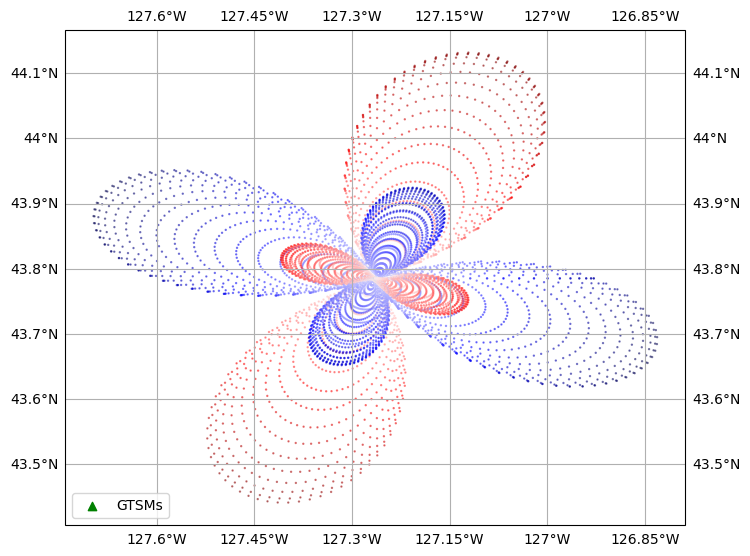

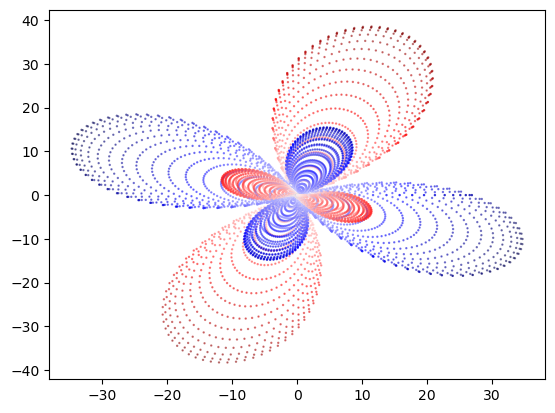

2010-01-10_M6.5
14
['B033' 'B035' 'B036' 'B057' 'B933' 'B935']
['-124.81' '40.53' '19' '-0.03' '-0.69' '0.73' '0.04' '-0.06' '0.21' '26'
 'X' 'Y' '201001100027A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


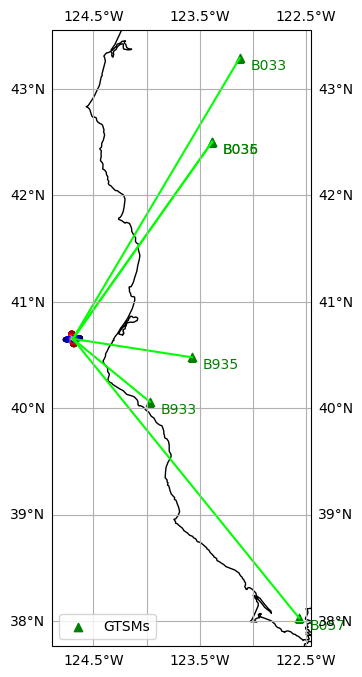

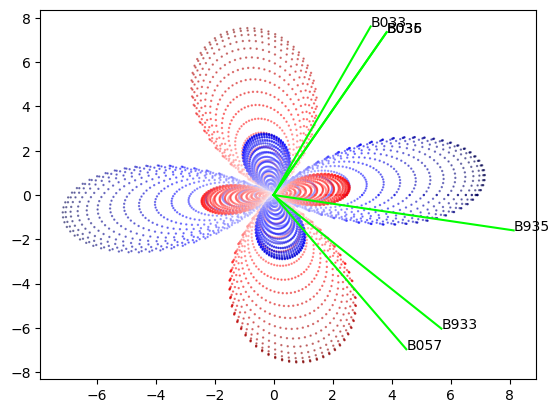

2010-04-04_M7.2
12
['B082']
['-115.39' '32.31' '13' '-0.23' '-0.64' '0.87' '0.04' '-0.06' '-0.05' '27'
 'X' 'Y' '201004042240A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


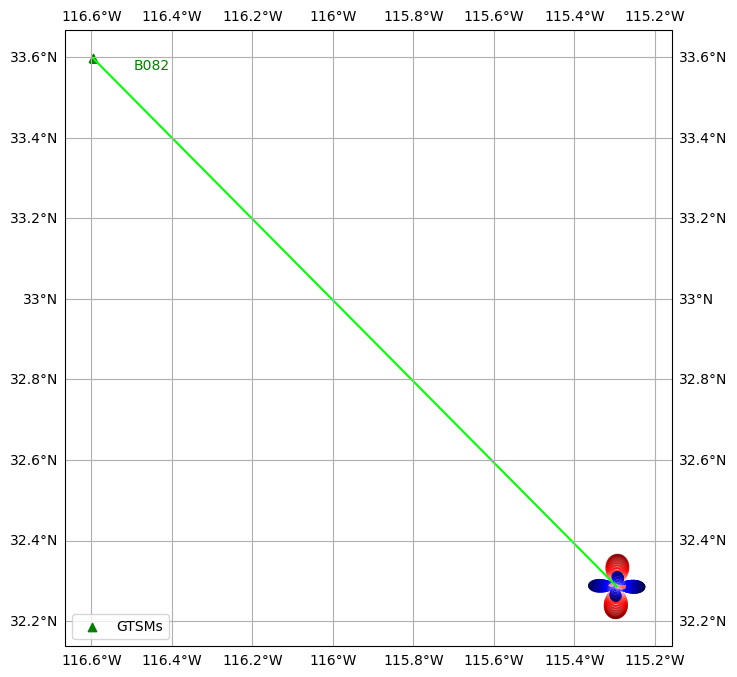

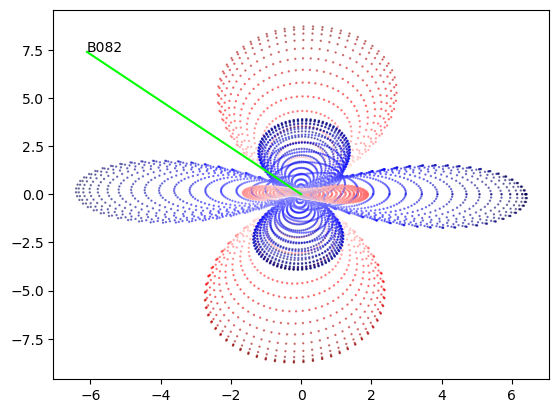

2011-09-09_M6.4
25
['B001' 'B003' 'B004' 'B005' 'B007' 'B009' 'B010' 'B011' 'B012' 'B013'
 'B014' 'B023' 'B024' 'B201' 'B926' 'B927' 'B928' 'B941' 'B943']
['-127.17' '49.27' '25' '-0.62' '-1.61' '2.22' '0.20' '-2.78' '5.14' '25'
 'X' 'Y' '201109091941A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


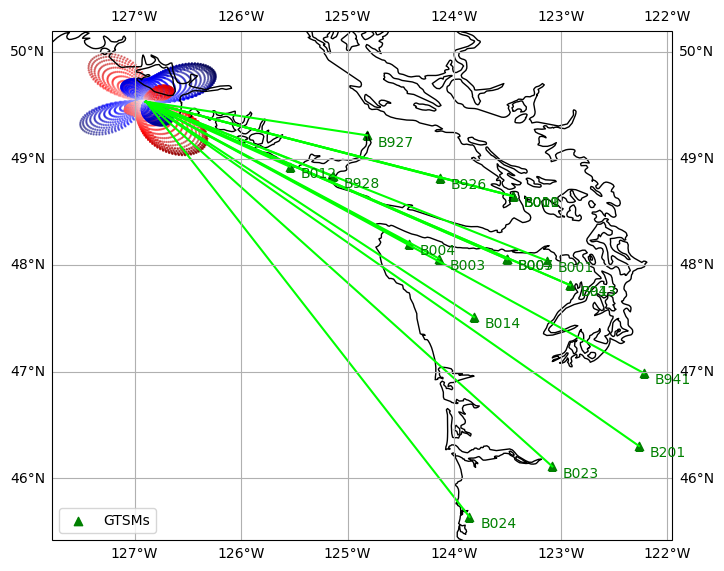

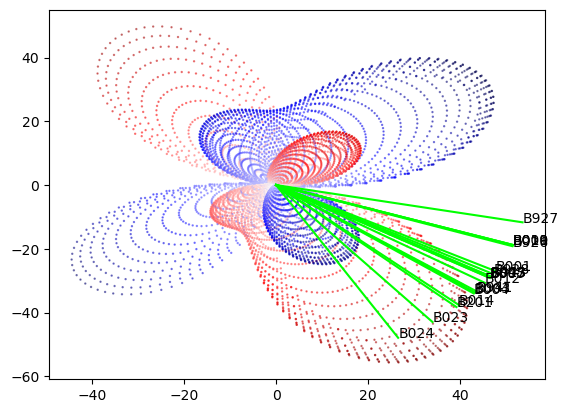

2012-04-11_M6
20
['B019' 'B020' 'B023' 'B024' 'B026' 'B027' 'B028' 'B030' 'B031' 'B032'
 'B033' 'B035' 'B036' 'B040' 'B933']
['-127.92' '43.40' '20' '-0.07' '-0.64' '0.71' '-0.56' '0.10' '-0.79' '25'
 'X' 'Y' '201204112241A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


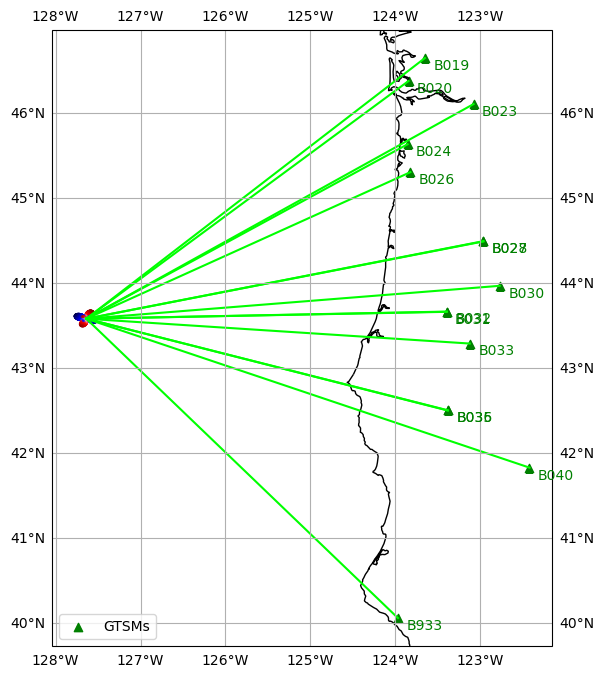

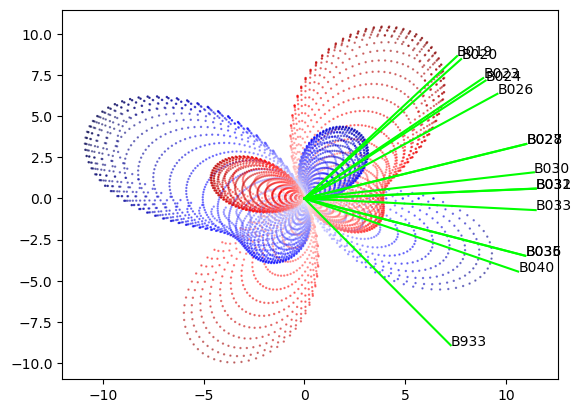

2012-11-08_M6.1
21
['B005' 'B006' 'B009' 'B010' 'B011' 'B012' 'B014' 'B926' 'B927' 'B928']
['-128.85' '48.90' '12' '-0.15' '-1.92' '2.07' '-0.53' '-0.39' '-0.39'
 '25' 'X' 'Y' '201211080201A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


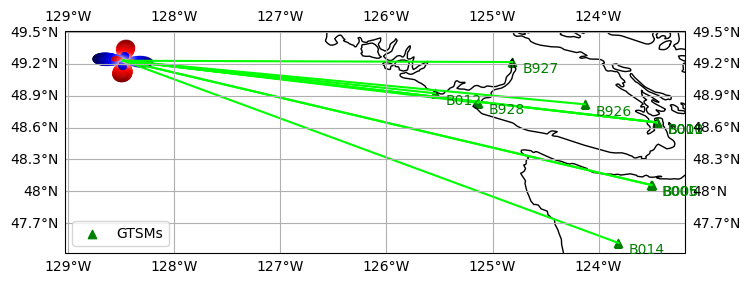

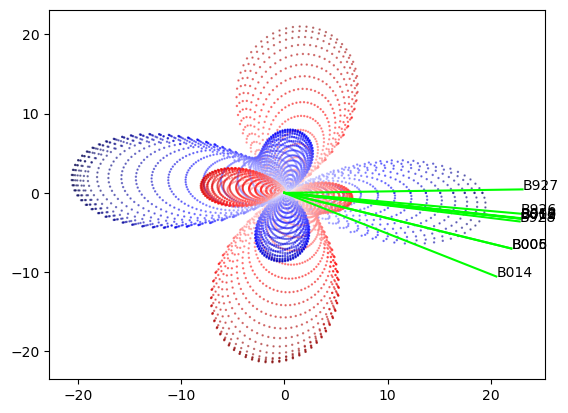

2012-12-14_M6.3
9
['B082' 'B086' 'B088' 'B093' 'B946']
['-119.61' '31.08' '21' '-4.03' '0.90' '3.13' '-0.53' '-0.76' '2.59' '25'
 'X' 'Y' '201212141036A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


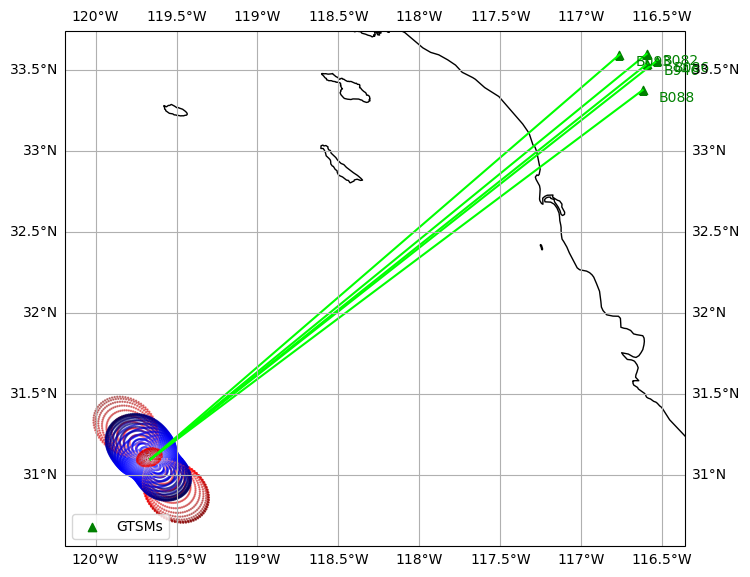

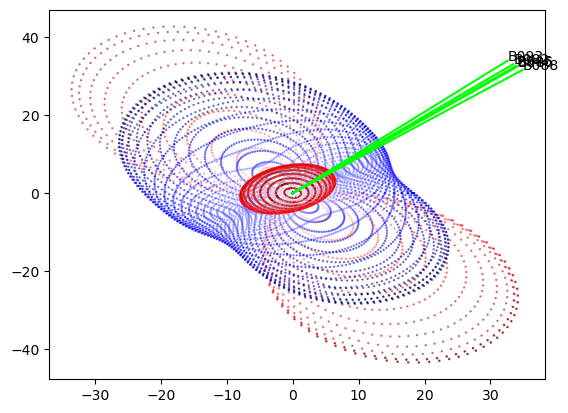

2013-09-03_M6.1
3
['B927']
['-130.61' '51.11' '12' '-0.10' '-0.53' '0.63' '0.00' '-0.48' '1.45' '25'
 'X' 'Y' '201309032019A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


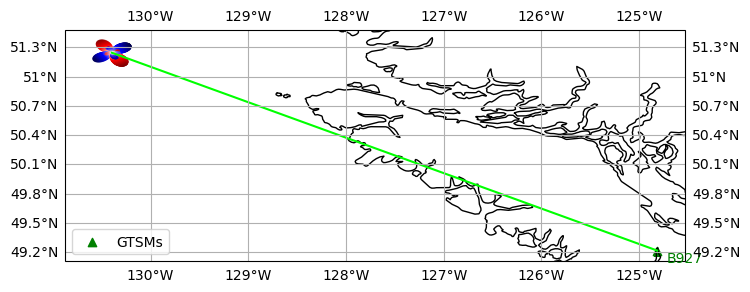

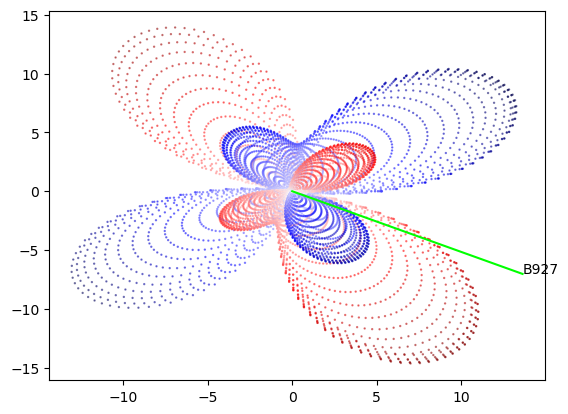

2013-09-04_M6
3
[]
['-130.43' '51.14' '17' '-0.01' '0.19' '-0.18' '0.05' '-0.55' '1.13' '25'
 'X' 'Y' '201309040023A']


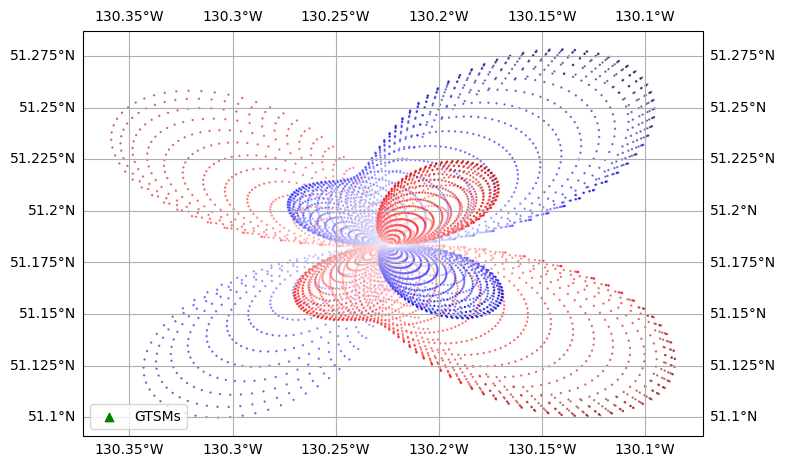

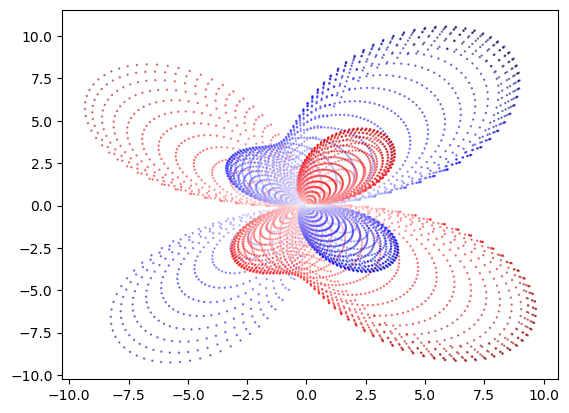

2014-03-10_M6.8
16
['B027' 'B028' 'B031' 'B032' 'B035' 'B036' 'B039' 'B040' 'B045' 'B933'
 'B934' 'B935']
['-125.23' '40.80' '15' '-0.06' '-2.84' '2.90' '0.21' '-0.08' '0.48' '26'
 'X' 'Y' '201403100518A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


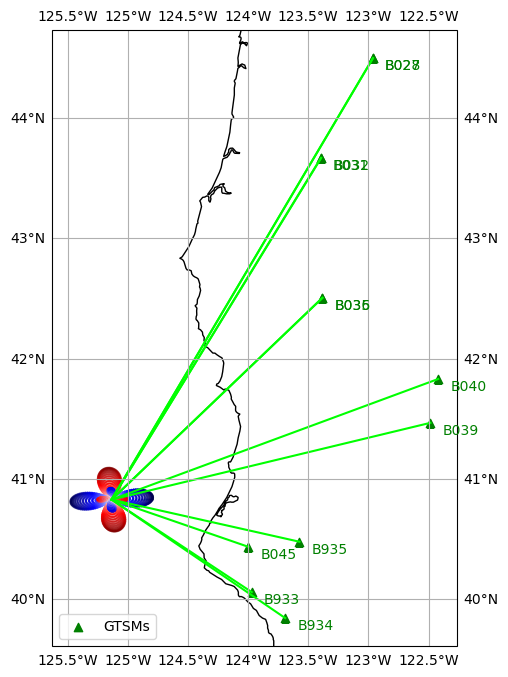

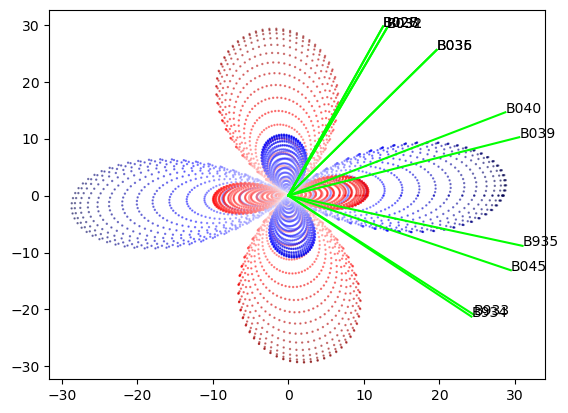

2014-04-24_M6.5
21
['B003' 'B004' 'B005' 'B006' 'B009' 'B010' 'B011' 'B012' 'B018' 'B926'
 'B927' 'B928']
['-127.59' '49.65' '17' '0.02' '-0.65' '0.63' '0.10' '-0.34' '0.59' '26'
 'X' 'Y' '201404240310A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


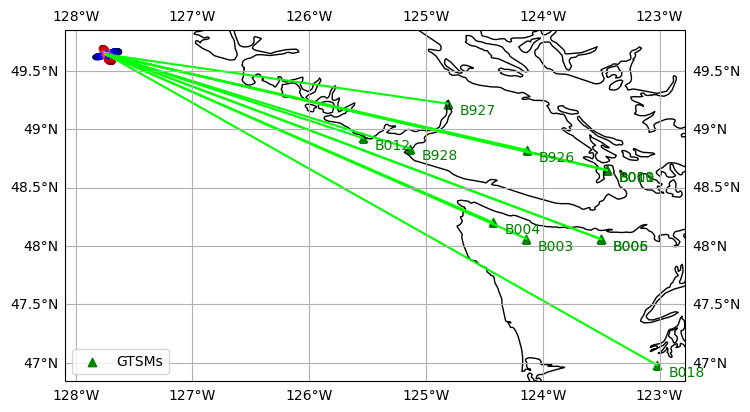

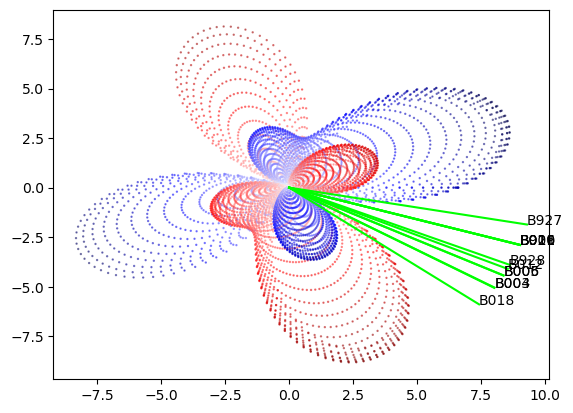

2014-08-24_M6.02
24
['B054' 'B057' 'B058' 'B065' 'B067' 'B075' 'B933' 'B934' 'B935']
['-122.38' '38.31' '12' '-0.05' '-1.09' '1.14' '-0.14' '-0.25' '1.12' '25'
 'X' 'Y' '201408241020A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


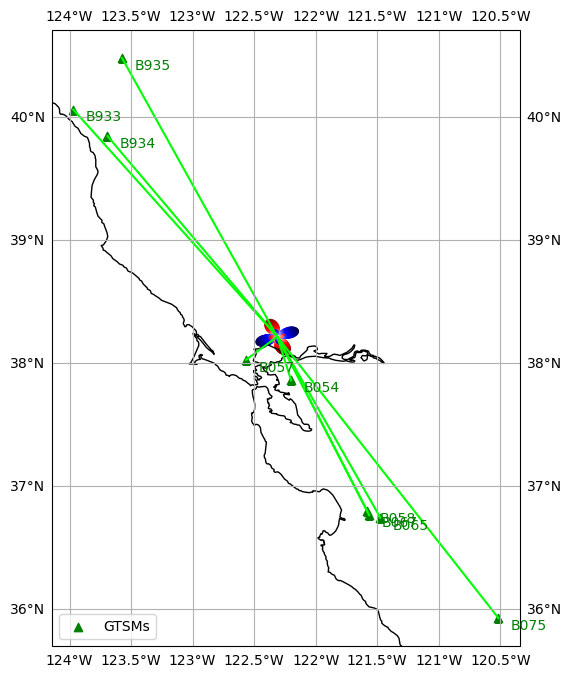

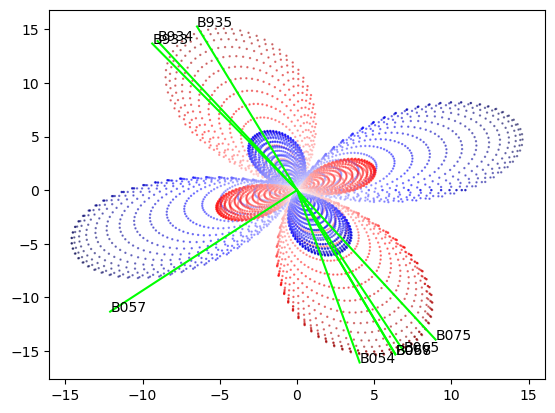

2016-12-08_M6.6
14
['B033' 'B035' 'B039' 'B040' 'B045' 'B057' 'B933' 'B934' 'B935']
['-126.46' '40.46' '21' '-0.13' '-0.01' '0.14' '0.04' '0.27' '-1.11' '26'
 'X' 'Y' '201612081450A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


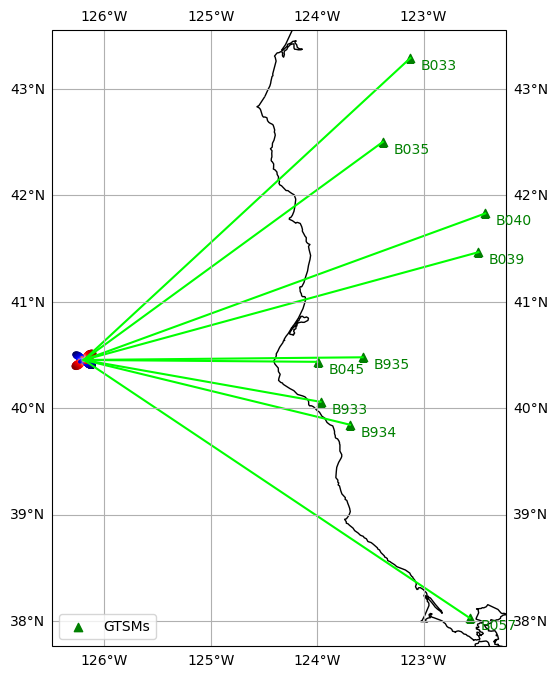

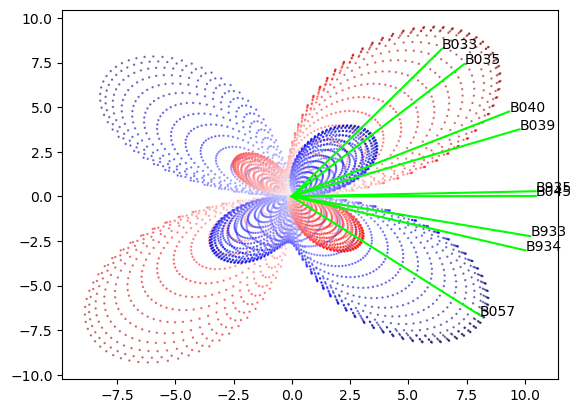

2018-08-22_M6.2
18
['B019' 'B022' 'B023' 'B027' 'B028' 'B030' 'B032' 'B033' 'B035' 'B036'
 'B039' 'B040' 'B045']
['-127.93' '43.50' '19' '-0.11' '-1.70' '1.81' '0.04' '0.03' '-1.54' '25'
 'X' 'Y' '201808220931A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


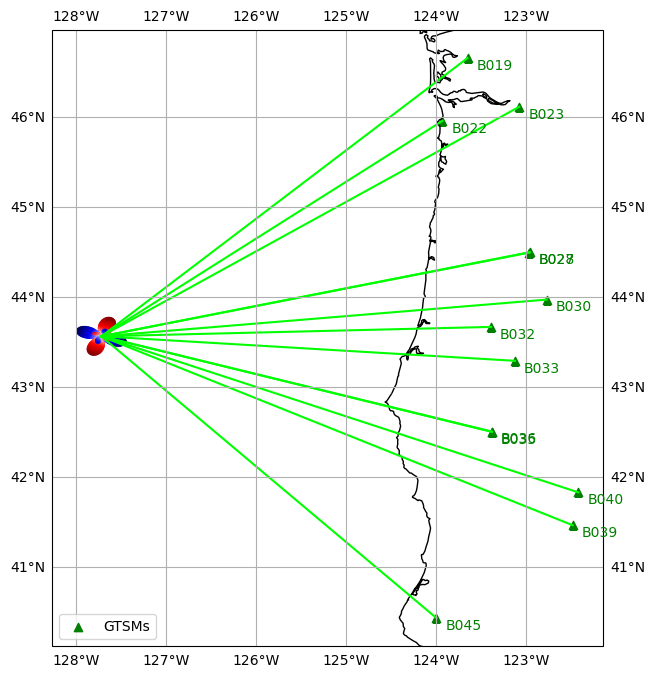

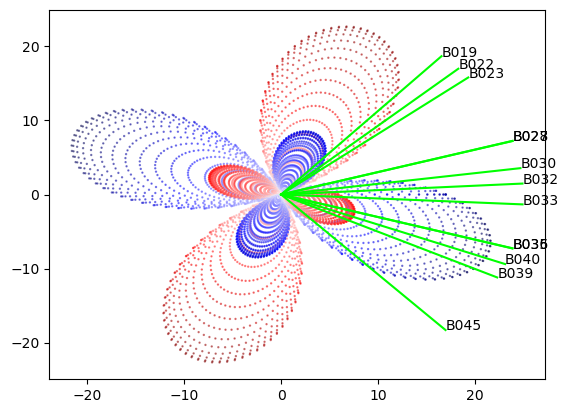

2018-10-22T05_M6.5
13
['B004' 'B006' 'B012' 'B926' 'B927' 'B928']
['-129.54' '48.95' '15' '-0.33' '-6.51' '6.84' '-0.17' '-0.13' '-1.95'
 '25' 'X' 'Y' '201810220539A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


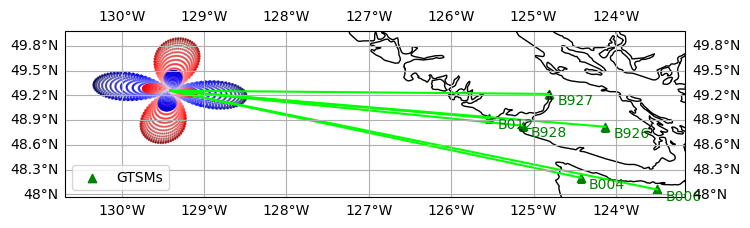

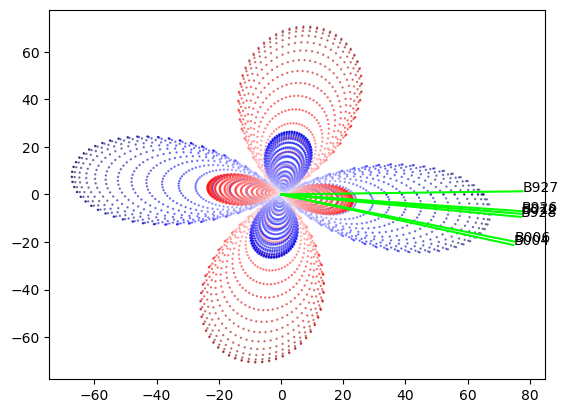

2018-10-22_M6.8
16
['B927']
['-129.89' '49.14' '16' '-0.16' '-1.56' '1.71' '0.08' '-0.02' '-0.42' '26'
 'X' 'Y' '201810220616A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


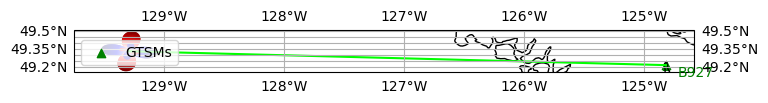

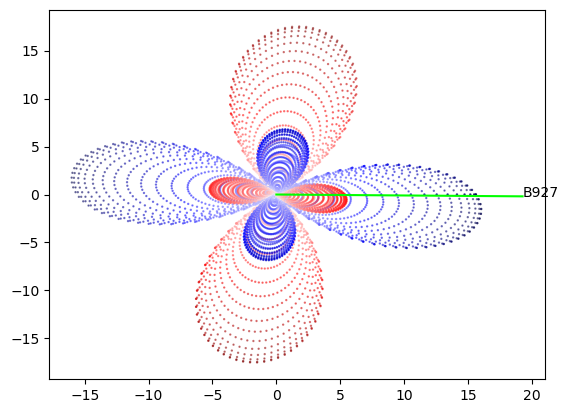

2018-10-22T06_M6.5
12
[]
['-130.13' '49.00' '15' '-0.02' '-5.60' '5.62' '0.09' '-1.21' '2.34' '25'
 'X' 'Y' '201810220622A']


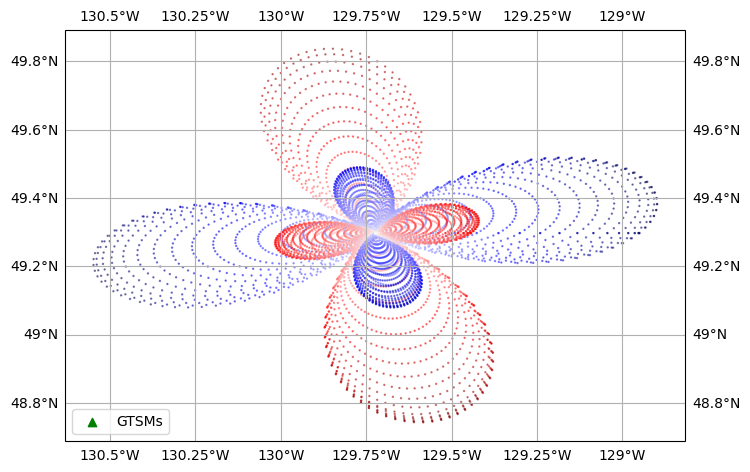

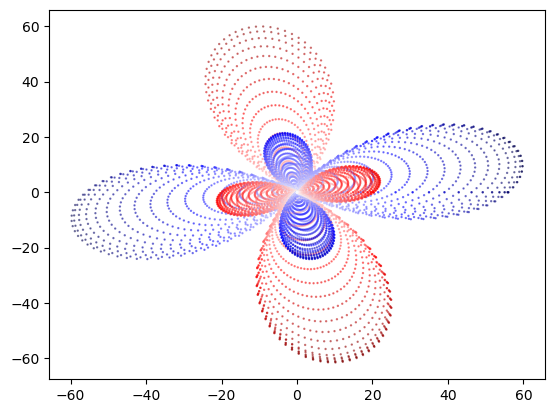

2019-07-04_M6.2
3
['B927' 'B928']
['-130.64' '51.16' '12' '-0.08' '-1.18' '1.26' '0.26' '-0.66' '2.35' '25'
 'X' 'Y' '201907040430A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


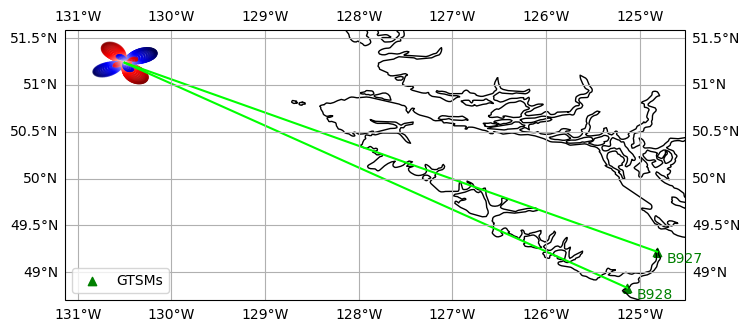

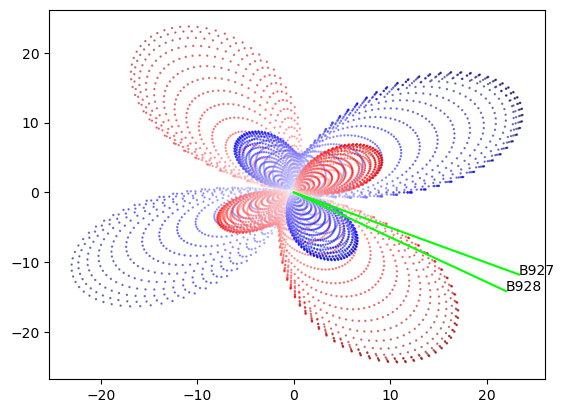

2019-07-04_M6.4
25
['B058' 'B067' 'B072' 'B073' 'B075' 'B076' 'B078' 'B081' 'B084' 'B086'
 'B087' 'B088' 'B093' 'B900' 'B901' 'B916' 'B917' 'B921' 'B946']
['-117.54' '35.69' '13' '-0.46' '-5.68' '6.13' '-0.00' '-0.56' '0.49' '25'
 'X' 'Y' '201907041733B']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


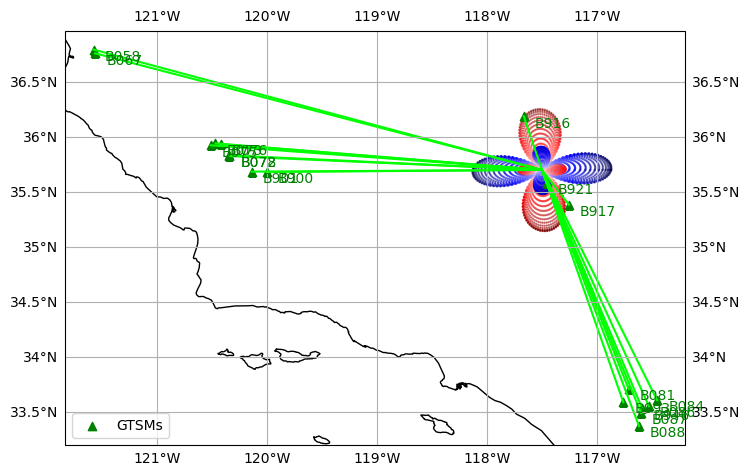

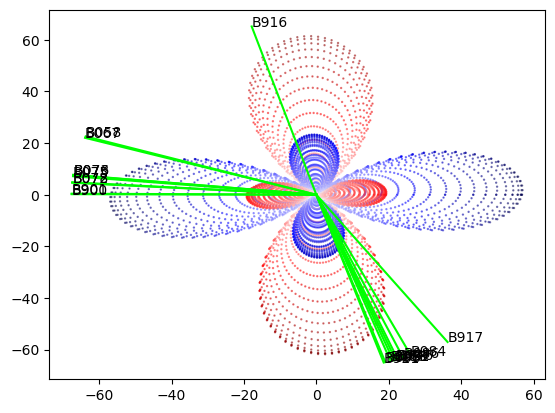

2019-07-06_M7.1
25
['B058' 'B065' 'B067' 'B072' 'B073' 'B075' 'B076' 'B078' 'B079' 'B081'
 'B084' 'B086' 'B088' 'B900' 'B901' 'B916' 'B917' 'B921' 'B946']
['-117.58' '35.78' '12' '-0.23' '-4.11' '4.34' '0.51' '0.49' '0.95' '26'
 'X' 'Y' '201907060319A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


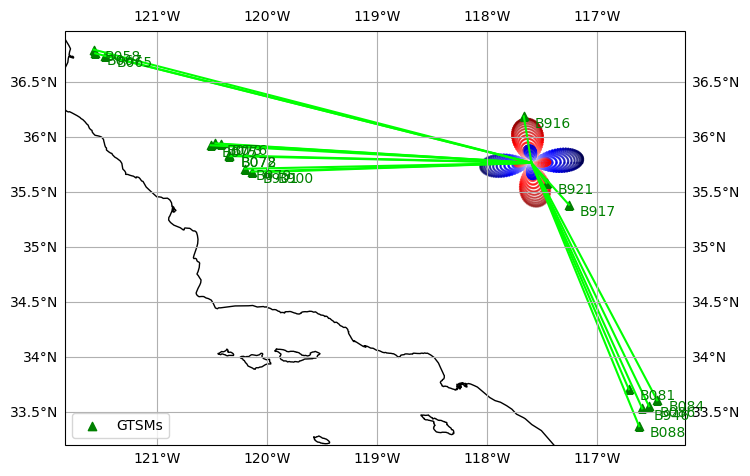

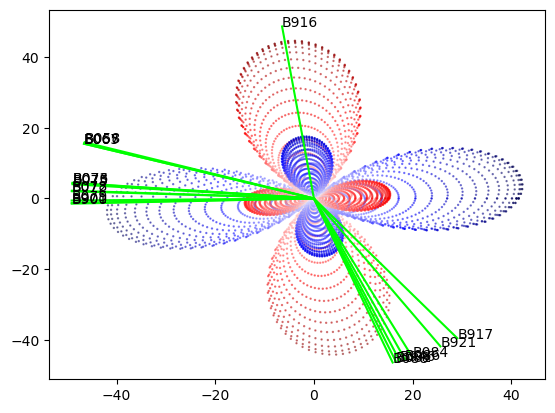

2019-08-29_M6.3
17
['B020' 'B022' 'B023' 'B024' 'B026' 'B027' 'B030' 'B032' 'B033']
['-128.06' '43.59' '18' '-0.24' '-2.69' '2.93' '0.01' '-0.22' '-2.45' '25'
 'X' 'Y' '201908291508A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


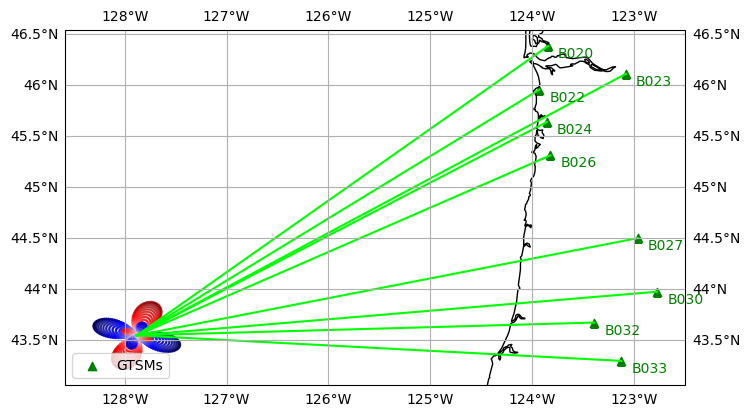

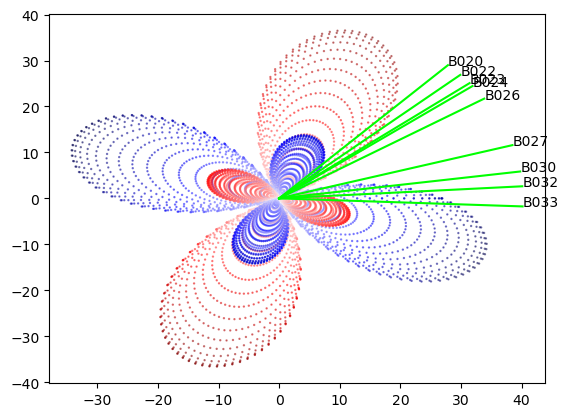

2019-12-23T19_M6
5
[]
['-130.18' '50.48' '12' '-0.01' '-1.22' '1.23' '-0.08' '-0.18' '0.38' '25'
 'X' 'Y' '201912231949A']


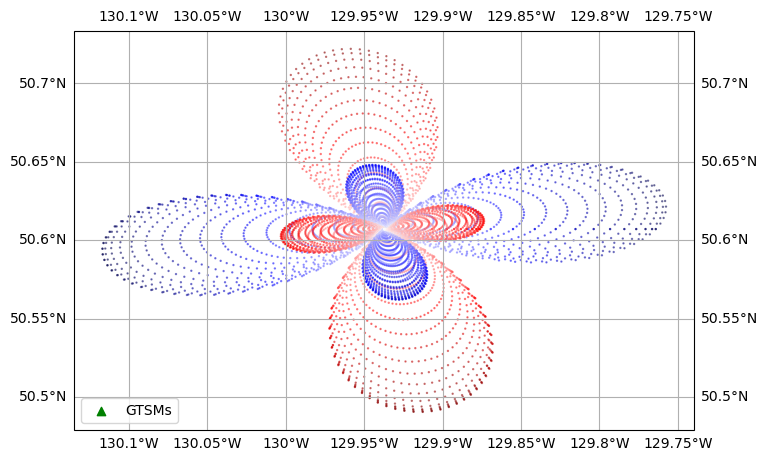

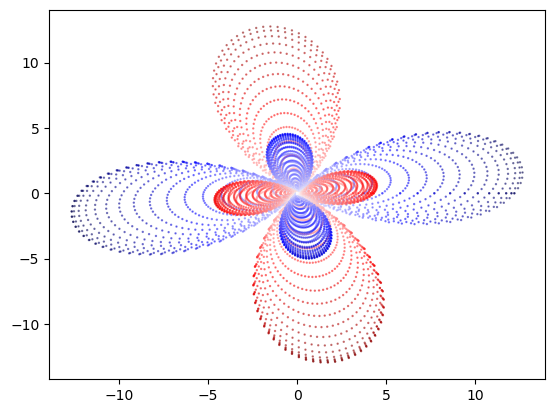

2019-12-23T20_M6
6
[]
['-129.91' '50.29' '12' '-0.07' '-1.39' '1.46' '-0.12' '-0.11' '0.06' '25'
 'X' 'Y' '201912232056A']


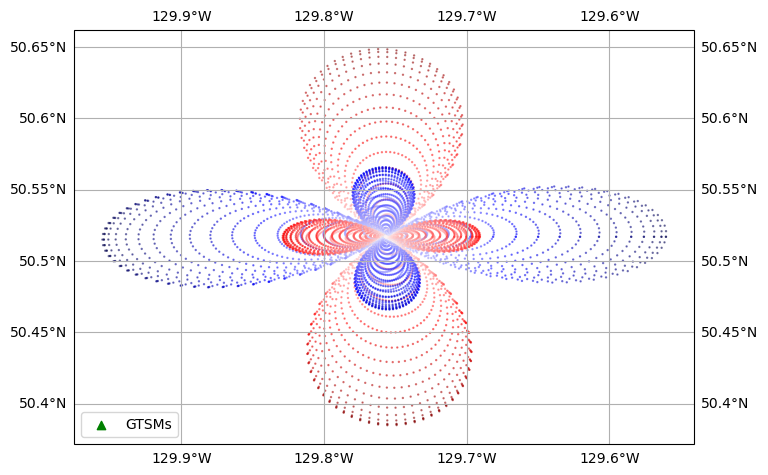

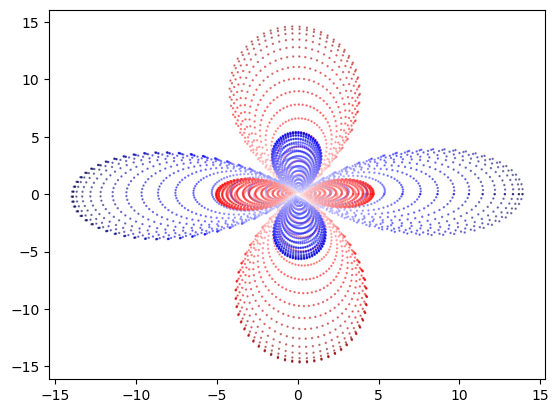

2019-12-25_M6.3
5
['B927' 'B928']
['-130.22' '50.41' '15' '-0.14' '-2.11' '2.24' '-0.00' '-0.35' '2.41' '25'
 'X' 'Y' '201912250335A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


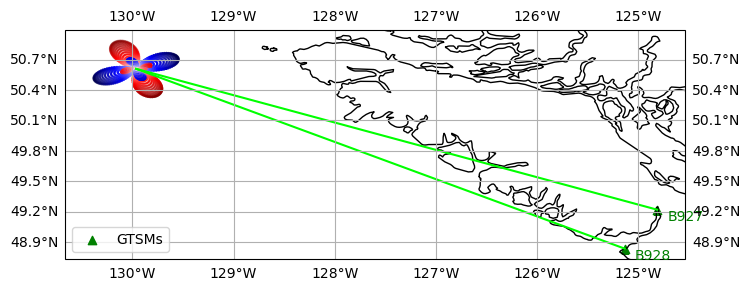

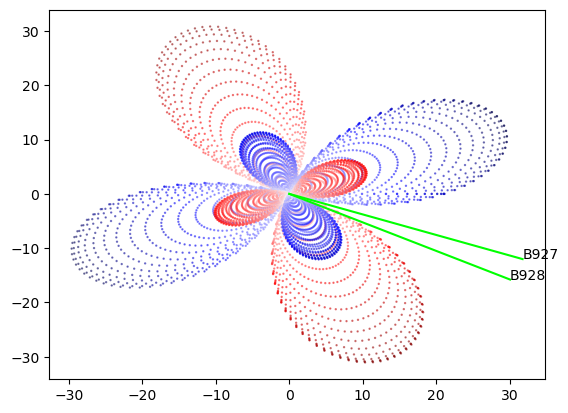

2020-03-31_M6.5
4
['B944']
['-115.20' '44.45' '14' '-2.32' '1.78' '0.54' '1.12' '1.15' '-5.97' '25'
 'X' 'Y' '202003312352A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


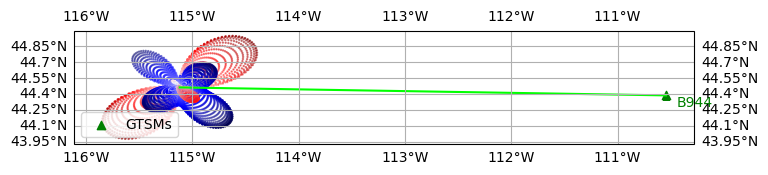

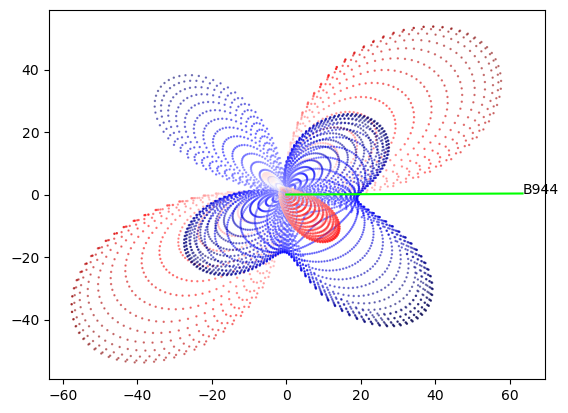

2020-05-15_M6.5
17
['B900' 'B916' 'B921']
['-117.85' '38.21' '12' '-1.35' '-2.04' '3.39' '-1.53' '0.20' '5.46' '25'
 'X' 'Y' '202005151103A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


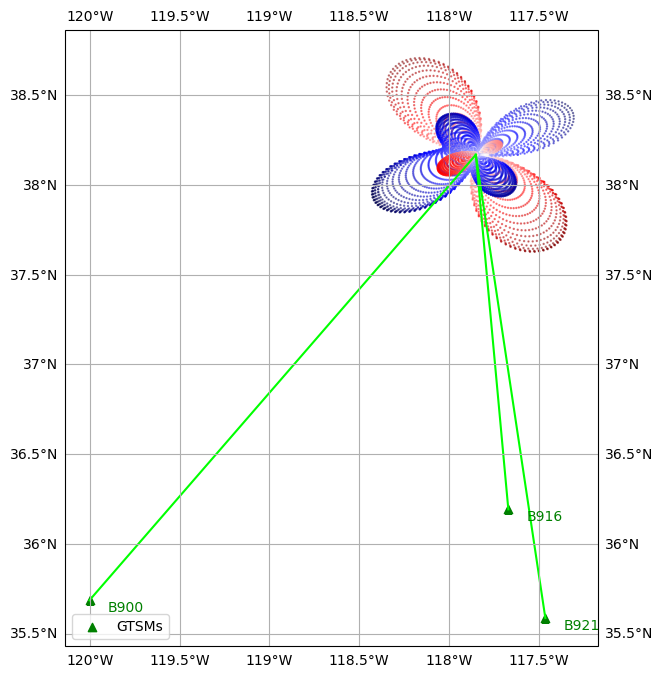

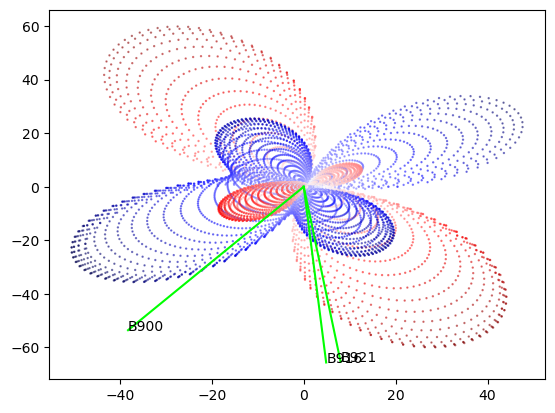

2021-07-08_M6
23
['B045' 'B054' 'B057' 'B058' 'B065' 'B067' 'B073' 'B900' 'B901' 'B916'
 'B934']
['-119.48' '38.51' '12' '-0.91' '-0.22' '1.12' '0.03' '-0.19' '0.18' '25'
 'X' 'Y' '202107082250B']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


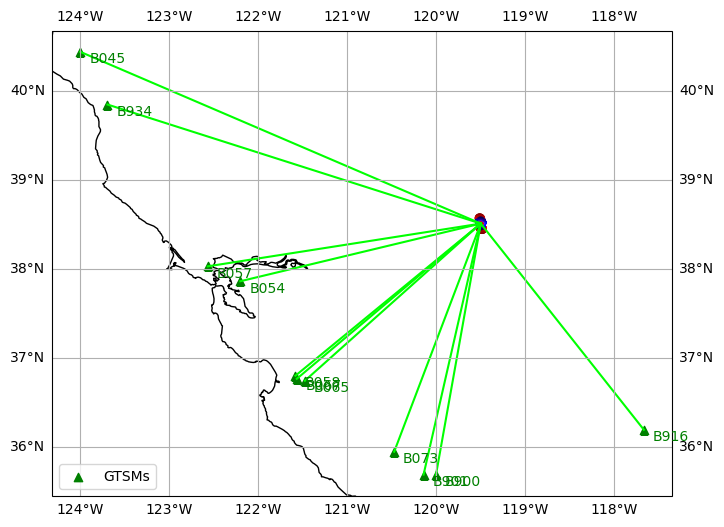

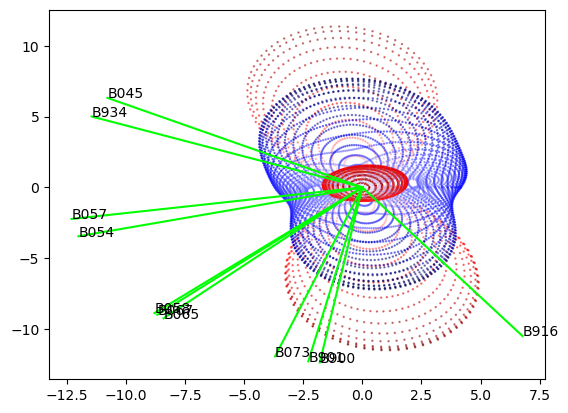

2021-12-20_M6.2
19
['B033' 'B035' 'B036' 'B039' 'B040' 'B045' 'B054' 'B057' 'B058' 'B065'
 'B933' 'B934' 'B935']
['-124.41' '40.36' '29' '0.18' '-2.07' '1.89' '0.03' '-0.75' '-1.51' '25'
 'X' 'Y' '202112202010A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


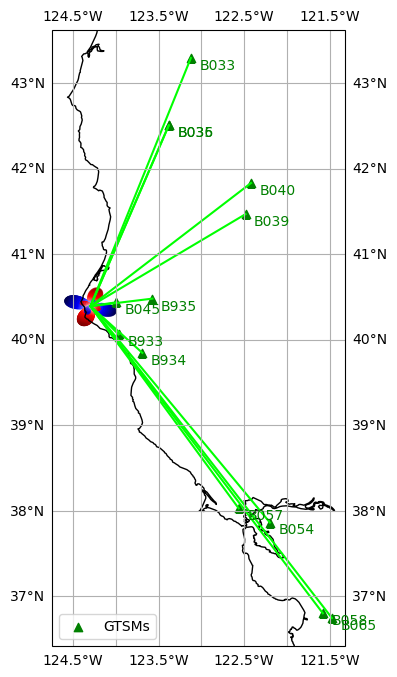

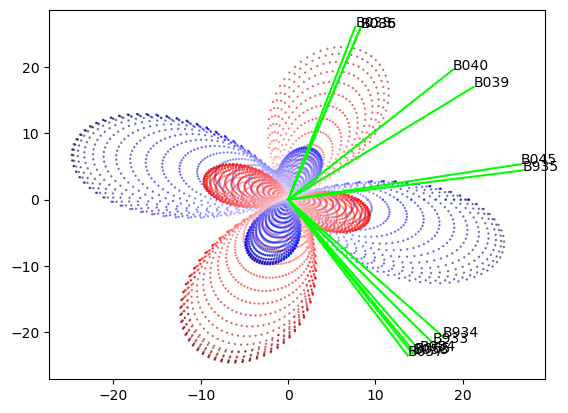

2022-11-22_M6.2
7
['B081' 'B086' 'B088' 'B093' 'B946']
['-116.42' '30.74' '12' '-0.09' '-1.94' '2.04' '0.21' '0.31' '0.53' '25'
 'X' 'Y' '202211221639A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


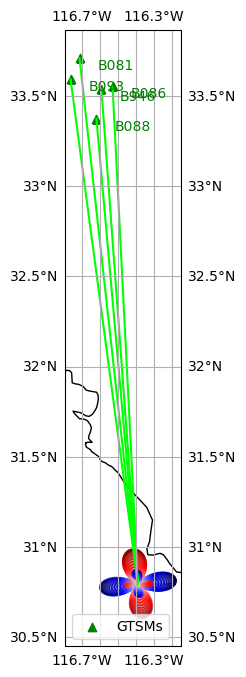

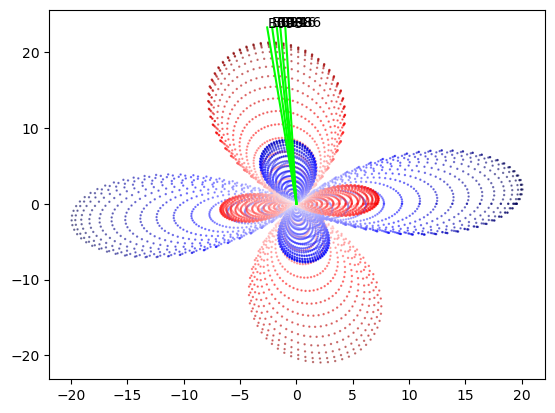

2022-12-20_M6.4
18
['B030' 'B033' 'B035' 'B036' 'B039' 'B040' 'B045' 'B934' 'B935']
['-124.25' '40.62' '17' '0.17' '-2.82' '2.65' '-0.25' '-0.37' '3.40' '25'
 'X' 'Y' '202212201034A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


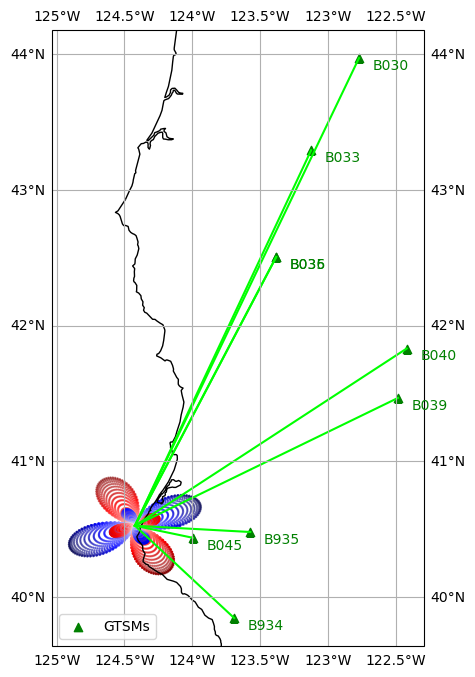

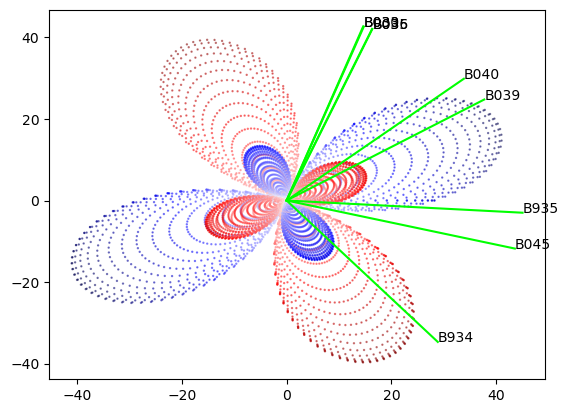

2023-04-13_M6
12
['B006' 'B012' 'B927' 'B928']
['-129.77' '49.11' '22' '-0.15' '-1.46' '1.62' '0.18' '-0.11' '-0.66' '25'
 'X' 'Y' '202304131554A']


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_79067/234389377.py:68: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)


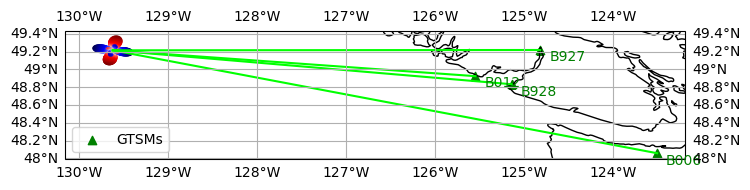

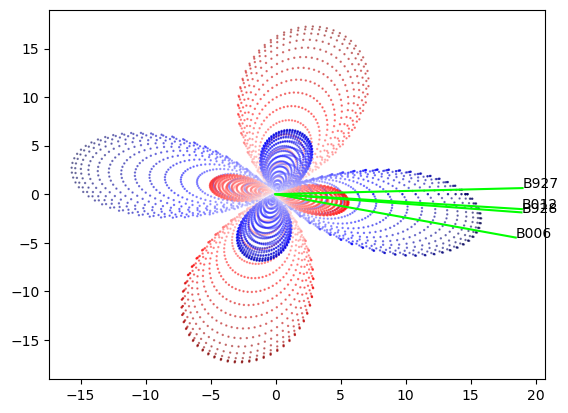

In [137]:
for idx in range(len(psmeca)):
    
    usgs_eq = eqs_rev.iloc[idx]
    ot = usgs_eq.time
    mag = usgs_eq.mag
    usgs_lon = float(usgs_eq.longitude)
    usgs_lat = float(usgs_eq.latitude)

    if idx in rows_for_extra_times:
        cut_ot = ot[:13]
    else:
        cut_ot = ot[:10]

    eq_name = str(cut_ot) + '_M' + str(mag)
    print(eq_name)
    
    j = np.where(dist_array[:,0] == eq_name)[0]
    print(len(j))
    stas_w_data = dist_array[j]
    k = np.where((stas_w_data[:,9] != 'nan') & (stas_w_data[:,9].astype(float) > 2))[0]
    stas_w_data = stas_w_data[k,5]
    # print(stas_w_data)
    stas_sub = na_stas.query('BNUM in @stas_w_data').reset_index(drop = True)
    print(stas_sub['BNUM'].values)
    
    row = psmeca[idx]
    print(row)
    
    epi_lon = float(row[0])
    epi_lat = float(row[1])
    
    Mrr = float(row[3])
    Mtt = float(row[4])
    Mpp = float(row[5]) 
    Mrt = float(row[6]) 
    Mrp = float(row[7]) 
    Mtp = float(row[8])
    
    Mzz = Mrr
    Mxx = Mtt
    Myy = Mpp
    Mxz = Mrt
    Myz = -Mrp
    Mxy = -Mtp

    cart_mt = 10 * np.array((Mxx, Mxy, Mxz, Myy, Myz, Mzz))
    
    # Get the radiation pattern
    x_slice, y_slice, flat_clrP = rad_pattern(cart_mt)

    # Convert from km (check to make sure it is this!) to degrees
    lat_slice, lon_slice = km_to_lat_lon(x_slice, y_slice, usgs_lat, usgs_lon)

    # Plot map figure
    fig = plt.figure(figsize = (8, 8))
    ax = plt.axes(projection = ccrs.PlateCarree())

    for i in range(len(lon_slice)):
        plt.scatter(lon_slice[i], lat_slice[i], s = 0.5, alpha = 0.5, color = flat_clrP[i])   

    # Plot lines to stations and calculate azimuth between epicenter and station location
    stas_list = []
    azs_list = []
    for idx2 in range(len(stas_sub)):
        sta = stas_sub['BNUM'].values[idx2]
        sta_lon = stas_sub['LONG'].values[idx2]
        sta_lat = stas_sub['LAT'].values[idx2]
        distaz = gps2dist_azimuth(usgs_lat, usgs_lon, sta_lat, sta_lon)
        eq2sta_az = distaz[1] # degrees clockwise from north
        stas_list.append(sta)
        azs_list.append(eq2sta_az)
        lons = [usgs_lon, sta_lon]
        lats = [usgs_lat, sta_lat]
        plt.plot(lons, lats, color = 'lime')
        
    # Plot stations
    plt.scatter(stas_sub['LONG'], stas_sub['LAT'], marker = '^', color = 'green', label = 'GTSMs')
    [plt.text(i, j, f'{name}', va = 'top', ha = 'left', color = 'green') for (i, j, name) in zip(stas_sub['LONG']+0.1, stas_sub['LAT'], stas_sub['BNUM'])]
    
    # Label/detail map
    ax.legend(loc = 'lower left')
    ax.coastlines()
    gl = ax.gridlines(draw_labels = True)
    
    plt.show()
    
    # Flat map with angles
    for i in range(len(x_slice)):
        plt.scatter(x_slice[i], y_slice[i], s = 0.5, alpha = 0.5, color = flat_clrP[i])  
    xmax = np.max(x_slice)
    ymax = np.max(y_slice)
    
    if xmax >= ymax:
        plot_max = xmax * 1.1
    else:
        plot_max = ymax * 1.1

    for idx3 in range(len(azs_list)):
        az = azs_list[idx3]
        sta = stas_list[idx3]
        
        # Convert from azimuth to geometric angle
        angle = 450 - az
        if angle > 360:
            angle = angle - 360
        
        # Find the line endpoint
        endy = 0 + plot_max * np.sin(np.radians(angle))
        endx = 0 + plot_max * np.cos(np.radians(angle))

        # Plot the points
        plt.plot([0, endx], [0, endy], color = 'lime')
        plt.text(x = endx, y = endy, s = sta)

    plt.show()